In [ ]:
# 📌 Step 1: Load Dataset
print("📥 Step 1: Load Dataset")

from file_handler import load_data

# Load the data and handle DB storage inside load_data()
df, meta = load_data()

# Preview the data
if df is not None:
    print("\n✅ Data loaded successfully. Here's a preview:")
    print(df.head())

    # Save metadata: store origin so it can be referenced in future steps
    with open("data_origin.txt", "w") as f:
        f.write("db" if meta.get("db") else "file")

    # Optionally store to CSV for later use if not stored in DB
    if not meta.get("db"):
        df.to_csv("loaded_data.csv", index=False)
        print("💾 Data saved locally as 'loaded_data.csv'.")

else:
    print("❌ Failed to load data.")


In [2]:
# 📌 Step 2: Load Data for Understanding
print("📖 Step 2: Understanding Dataset")

from data_understanding import fetch_data_from_file, fetch_data_from_db_using_saved_credentials, data_summary

import os

def load_data_based_on_origin():
    """Determines the data source and loads accordingly."""
    origin_file = "data_origin.txt"

    # Determine data origin: file or db
    if os.path.exists(origin_file):
        with open(origin_file, "r") as f:
            origin = f.read().strip().lower()
    else:
        print(f"⚠️ File '{origin_file}' not found. Defaulting to 'file'.")
        origin = "file"

    # Load the data
    if origin == "db":
        print("📡 Loading data from database using saved credentials...")
        df = fetch_data_from_db_using_saved_credentials()
    elif origin == "file":
        print("📁 Loading data from local file...")
        df = fetch_data_from_file()
    else:
        print(f"❌ Invalid origin '{origin}' in '{origin_file}'. Use 'db' or 'file'.")
        return None

    return df

# Load data
df = load_data_based_on_origin()

# Show summary if data is loaded
if df is not None:
    print("\n✅ Data loaded successfully. Summary below:\n")
    data_summary(df)
else:
    print("⚠️ Failed to load data. Please check previous steps or data source.")


📖 Step 2: Understanding Dataset
📡 Loading data from database using saved credentials...
🔌 Connecting to MySQL on localhost:2106 using saved credentials...


d:\Tasks\ML_Pipeline\data_understanding.py:45: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, con=conn)


✅ Data loaded from database 'weather', table 'weather_data'.

✅ Data loaded successfully. Summary below:


Data Shape: (5576434, 13)

Data Types:
 EventId            object
Type               object
Severity           object
StartTime(UTC)     object
EndTime(UTC)       object
TimeZone           object
LocationLat       float64
LocationLng       float64
AirportCode        object
City               object
County             object
State              object
ZipCode           float64
dtype: object

Missing Values:
 EventId               0
Type                  0
Severity              0
StartTime(UTC)        0
EndTime(UTC)          0
TimeZone              0
LocationLat           0
LocationLng           0
AirportCode           0
City              10784
County                0
State                 0
ZipCode           43630
dtype: int64

Descriptive Statistics:
         EventId     Type Severity       StartTime(UTC)         EndTime(UTC)  \
count   5576434  5576434  5576434              557643

In [3]:
print("🧼 Step 3: Data Preprocessing")

from preprocessing import preprocess_pipeline

try:
    scale_method = input("Which scaling method to use? (standard / minmax) [default=standard]: ").strip().lower()
    if scale_method not in ['standard', 'minmax', '']:
        raise ValueError("❌ Invalid scaling method. Choose from standard or minmax.")
    if not scale_method:
        scale_method = 'standard'

    preprocessed_df = preprocess_pipeline(df, scale_method=scale_method)

    print("✅ Data preprocessing complete.")
    print(preprocessed_df.head())

except Exception as e:
    print(f"❌ Preprocessing failed: {e}")


🧼 Step 3: Data Preprocessing
✅ Data preprocessing complete.
    EventId     Type  Severity  StartTime(UTC)  EndTime(UTC)  TimeZone  \
0 -0.418918  0.44327 -0.617045       -1.772358     -1.773586  1.215466   
1 -0.412463  0.44327 -0.617045       -1.772251     -1.773504  1.215466   
2 -0.406233  0.44327 -0.617045       -1.772184     -1.773433  1.215466   
3 -0.399870  0.44327 -0.617045       -1.772118     -1.773370  1.215466   
4 -0.393754  0.44327 -0.617045       -1.771932     -1.773181  1.215466   

   LocationLat  LocationLng  AirportCode      City    County    State  ZipCode  
0    -0.120826    -1.064841    -1.737582  1.042198  0.964653 -1.38369  1.12485  
1    -0.120826    -1.064841    -1.737582  1.042198  0.964653 -1.38369  1.12485  
2    -0.120826    -1.064841    -1.737582  1.042198  0.964653 -1.38369  1.12485  
3    -0.120826    -1.064841    -1.737582  1.042198  0.964653 -1.38369  1.12485  
4    -0.120826    -1.064841    -1.737582  1.042198  0.964653 -1.38369  1.12485  


📊 Step 4: Data Visualization
🔍 Plotting Distributions...


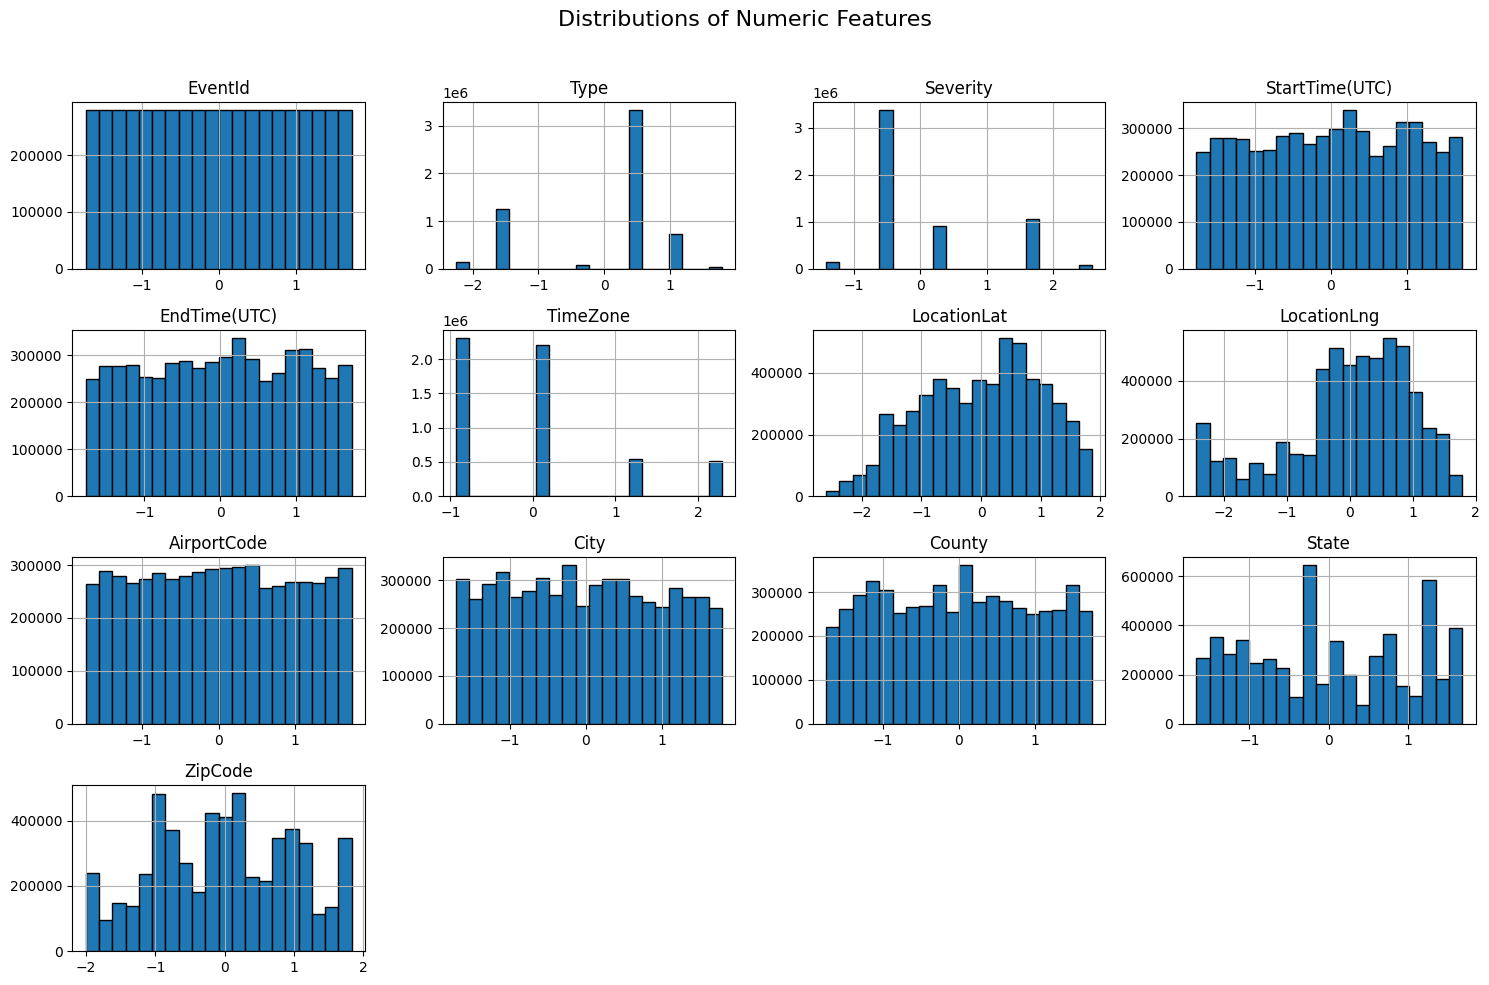

🔍 Plotting Correlation Heatmap...


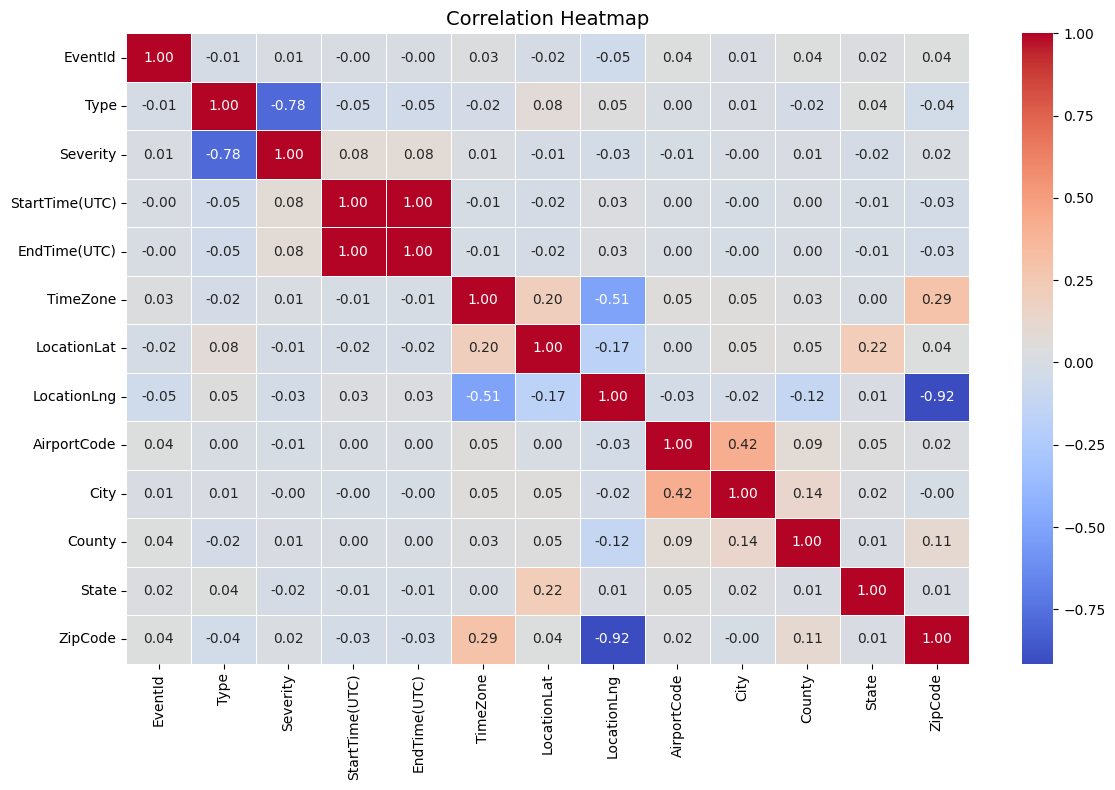

🔍 Plotting Boxplots...


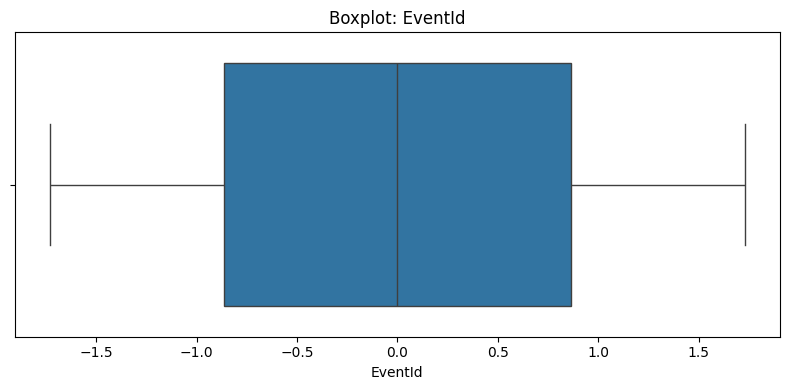

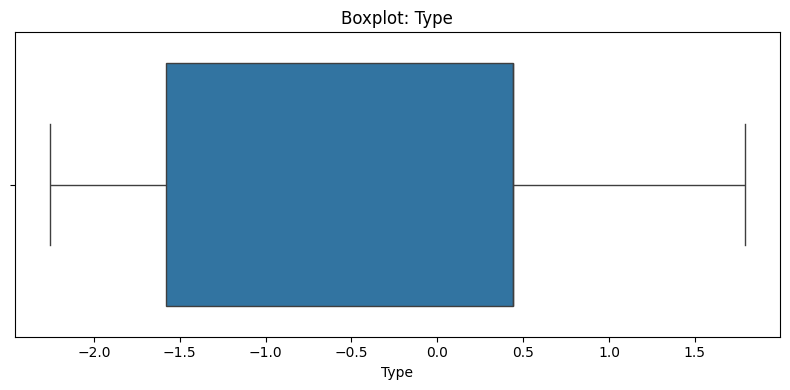

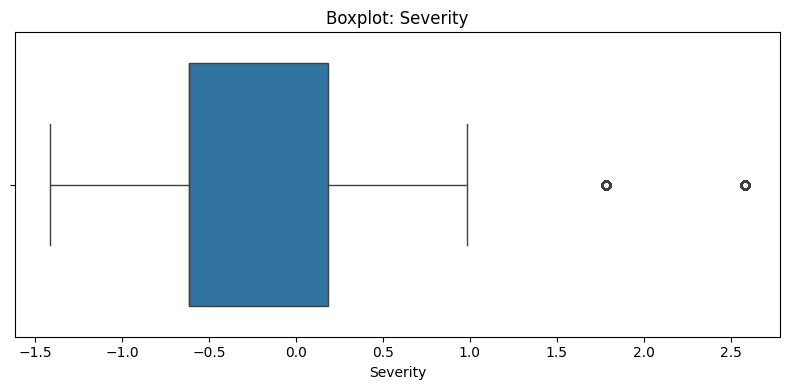

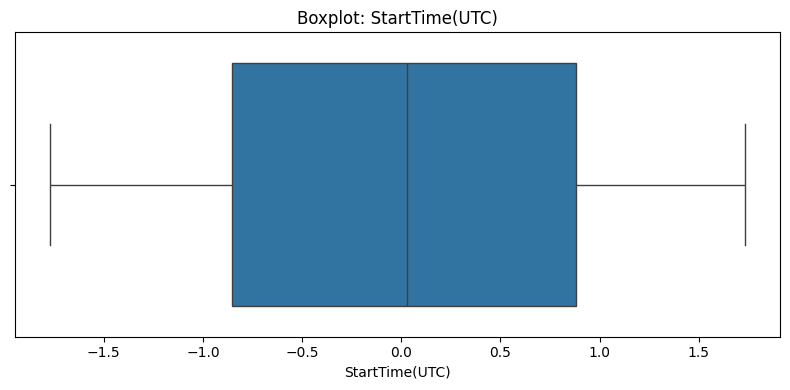

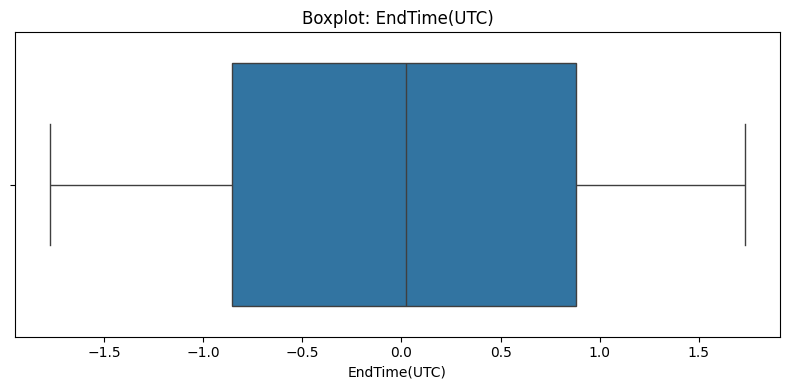

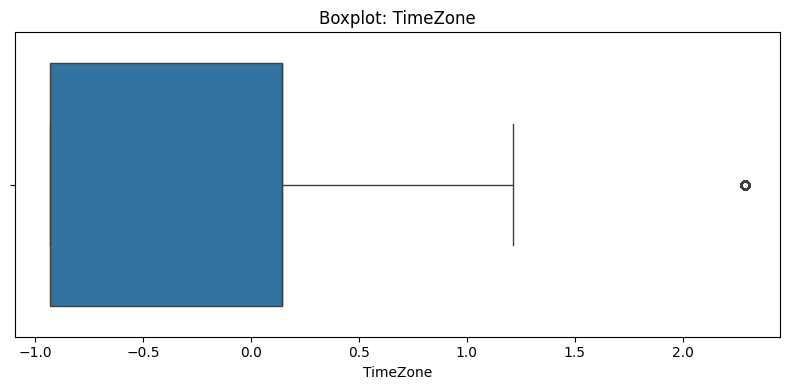

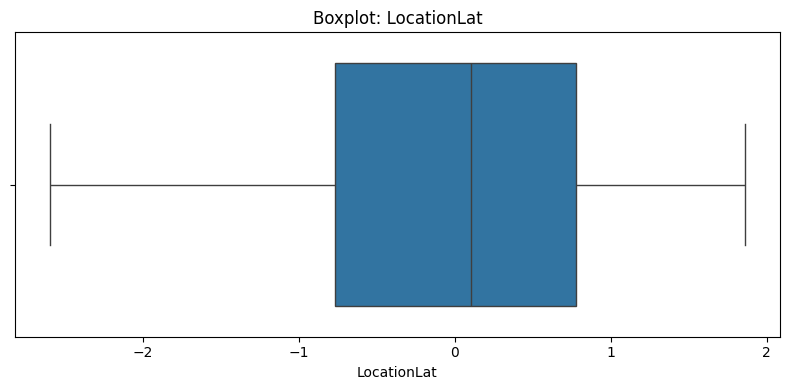

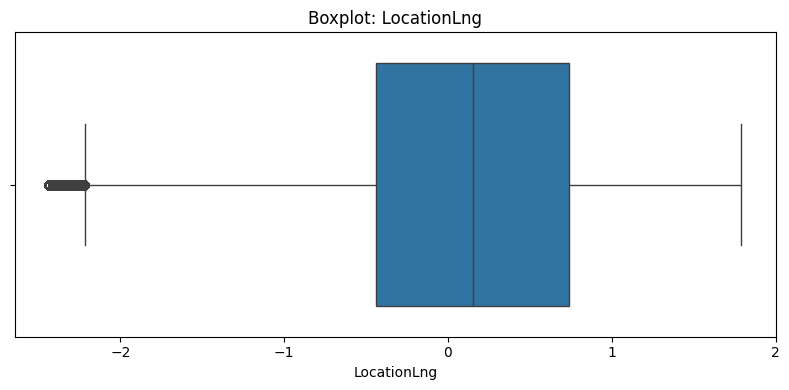

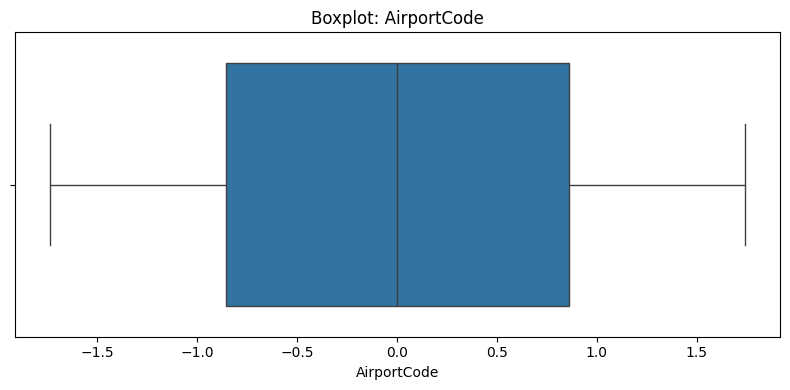

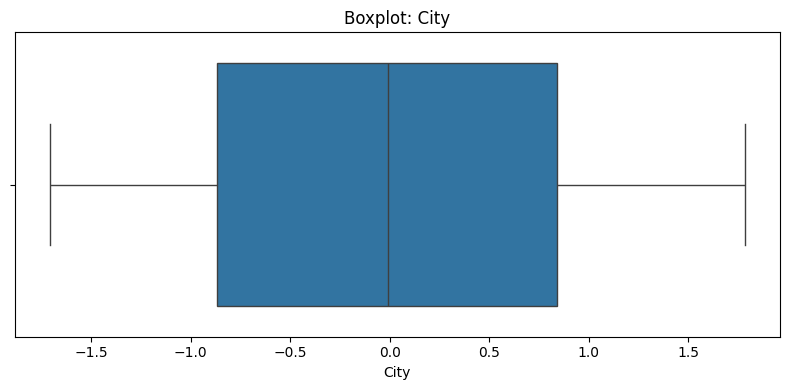

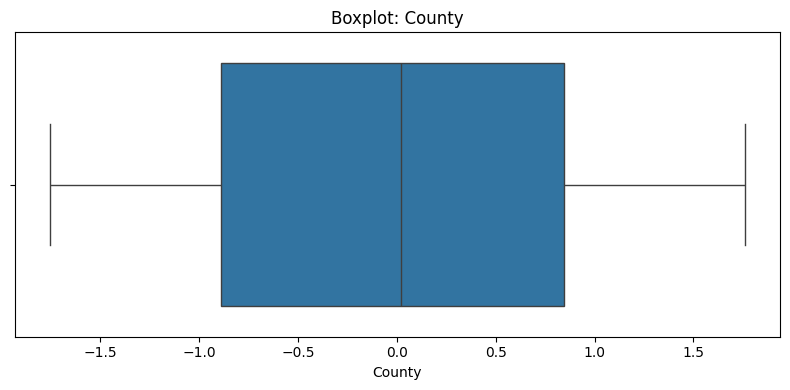

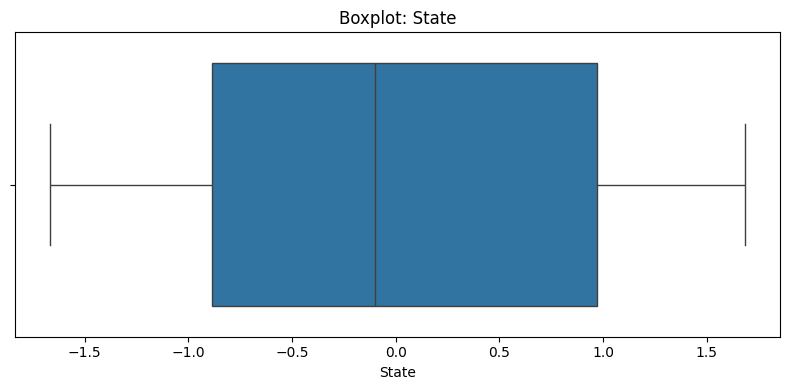

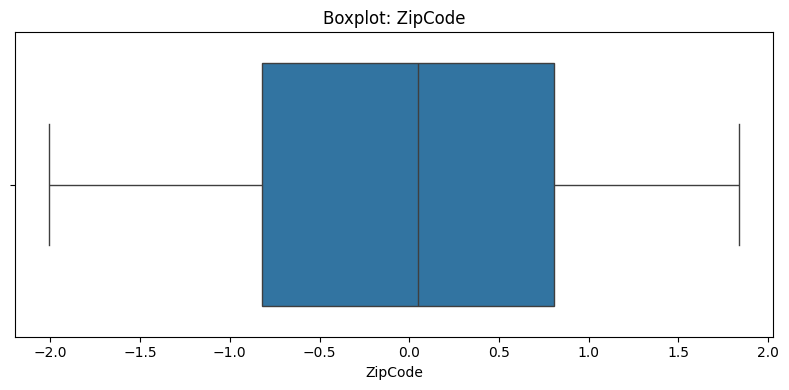

✅ Visualizations completed.


In [4]:
# 📌 Step 4: Data Visualization
print("📊 Step 4: Data Visualization")

import data_visualization as viz

# Plot visualizations 
try:
    viz.plot_all_graphs(preprocessed_df)
except Exception as e:
    print(f"❌ Visualization failed: {e}")

print("✅ Visualizations completed.")


In [5]:
# 📌 Step 5: Data Labeling
print("🏷️ Step 5: Label Your Data")

from data_labeling import label_data

print("Available columns:")
print(preprocessed_df.columns.tolist())

target_column = input("Enter the target (dependent) column name: ").strip()
labeled_df = label_data(preprocessed_df, target_column)

print(f"✅ Target column '{target_column}' has been encoded and labeled.")


🏷️ Step 5: Label Your Data
Available columns:
['EventId', 'Type', 'Severity', 'StartTime(UTC)', 'EndTime(UTC)', 'TimeZone', 'LocationLat', 'LocationLng', 'AirportCode', 'City', 'County', 'State', 'ZipCode']

How would you like to encode the target column 'Severity'?
1. Label Encoding (e.g., Cat → 0, Dog → 1)
2. One-Hot Encoding (e.g., Cat → [1,0], Dog → [0,1])
✅ Target column 'Severity' has been encoded and labeled.


In [6]:
print("🤖 Step 6: Model Training")

from model_training import run_model_pipeline
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

# Step 1: Detect problem type
problem_type = input("Is your problem supervised or unsupervised? (or press Enter to auto-detect) ").strip().lower()

if problem_type in ["", "supervised"]:
    task_type = input("Is it classification or regression? (or press Enter to auto-detect) ").strip().lower()

    if task_type == "classification":
        print("📊 Available classification models: logistic, decision_tree, random_forest, svm, lightgbm")
    elif task_type == "regression":
        print("📈 Available regression models: linear, decision_tree, random_forest, svm, lightgbm")
    elif task_type == "":
        print("ℹ️ Auto-detecting task type based on target column...")
    else:
        raise ValueError("❌ Invalid task type. Choose 'classification', 'regression', or leave blank.")

    model_choice = input("Enter model to train (or press Enter for default): ").strip().lower() or "lightgbm"
    task_type = task_type if task_type in ["classification", "regression"] else None

    # One-hot encoded target reconstruction
    if target_column not in labeled_df.columns:
        target_cols = [col for col in labeled_df.columns if col.startswith("Severity_")]
        if not target_cols:
            raise ValueError(f"❌ Target column '{target_column}' not found and no 'Severity_' columns detected.")

        print(f"ℹ️ Detected one-hot encoded target columns: {target_cols}")
        if labeled_df[target_cols].sum(axis=1).eq(1).all():
            combined_target = pd.Categorical.from_codes(
                labeled_df[target_cols].values.argmax(axis=1),
                categories=target_cols
            )
            labeled_df["combined_target"] = combined_target
            labeled_df.drop(columns=target_cols, inplace=True)
            target_column = "combined_target"
            print("✅ Reconstructed target column: 'combined_target'")
        else:
            raise ValueError("❌ Invalid one-hot encoded target structure.")

    # Optional: downcast numeric features to save memory
    for col in labeled_df.select_dtypes(include='float'):
        labeled_df[col] = pd.to_numeric(labeled_df[col], downcast='float')
    for col in labeled_df.select_dtypes(include='int'):
        labeled_df[col] = pd.to_numeric(labeled_df[col], downcast='integer')

    # Stratified train-test split
    print("📦 Splitting data (stratified)...")
    train_df, test_df = train_test_split(
        labeled_df,
        test_size=0.2,
        random_state=42,
        stratify=labeled_df[target_column]
    )

    # Merge back for model pipeline
    full_df = pd.concat([train_df, test_df])
    model = run_model_pipeline(full_df, target_column, problem_type=task_type, model_choice=model_choice)



elif problem_type == "unsupervised":
    print("⚠️ Unsupervised learning not implemented yet.")
else:
    raise ValueError("❌ Invalid problem type.")


🤖 Step 6: Model Training
ℹ️ Auto-detecting task type based on target column...
ℹ️ Detected one-hot encoded target columns: ['Severity_-1.4171795881077496', 'Severity_-0.6170451688247159', 'Severity_0.1830892504583177', 'Severity_0.9832236697413513', 'Severity_1.7833580890243848', 'Severity_2.5834925083074185']
✅ Reconstructed target column: 'combined_target'
📦 Splitting data (stratified)...
ℹ️ Auto-detected problem type: classification
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2357
[LightGBM] [Info] Number of data points in the train set: 4461147, number of used features: 12
[LightGBM] [Info] Start training from score -0.501996
[LightGBM] [Info] Start training from score -3.648296
[LightGBM] [Info] Start training from score -1.819229
[LightGBM] [Info] Start training from score

In [8]:
# 📌 Step 7: Save Model
print("💾 Step 7: Save Your Trained Model")

from model_saver import save_model

save_model(model)
print("✅ Model saved as a pickle file for deployment.")


💾 Step 7: Save Your Trained Model

✅ Model saved as trained_model.pkl
✅ Model saved as a pickle file for deployment.
